In [ ]:
#its a continiouse notebook with all the labs from this week except the recommender programm itself

In [637]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from random import randint
from time import sleep

In [638]:
url = "http://www.popvortex.com/music/charts/top-100-songs.php"

In [639]:
#download html with a get request
response = requests.get(url)
response.status_code

200

In [640]:
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
#soup.select("#chart-position-1")

In [ ]:
# explore finding song title

In [641]:
soup.select("cite.title")[0]

<cite class="title">The Next Episode (feat. Snoop Dogg)</cite>

In [642]:
soup.select("cite.title")[0].get_text() 

'The Next Episode (feat. Snoop Dogg)'

In [ ]:
#explore finding artist name

In [643]:
soup.select("em.artist")[0]

<em class="artist">Dr. Dre</em>

In [644]:
soup.select("em.artist")[0].get_text()

'Dr. Dre'

In [645]:
# select all titles and artists in a list
title_list=soup.select("cite.title")
artist_list= soup.select("em.artist")

In [646]:
num_iter = len(title_list)# get the number of titles
num_iter

100

In [647]:
#loop through selected lists and get only text
title = []
artist = []

for i in range(num_iter):
    title.append(title_list[i].get_text())
    artist.append(artist_list[i].get_text())
    
print(title)
print(artist)

['The Next Episode (feat. Snoop Dogg)', 'Still D.R.E. (feat. Snoop Dogg)', 'Lose Yourself', 'Family Affair', "We Don't Talk About Bruno", 'The Joker And The Queen (feat. Taylor Swift)', 'California Love (feat. Roger Troutman & Dr. Dre)', 'Forgot About Dre (feat. Eminem)', 'abcdefu', 'Numb Little Bug', 'Cold Heart (PNAU Remix)', 'Surface Pressure', 'In da Club', "'Til You Can't", 'Shivers', "Nuthin' but a G thang (feat. Snoop Dogg)", 'In Jesus Name (God Of Possible)', 'On My Way (Marry Me)', 'Good Morning Gorgeous', 'AA', 'MAMIII', 'Suga Suga', "Ain't No Mountain High Enough", 'Bad Habits', 'Easy On Me', 'Ghost', 'Heat Waves', 'Heaven', 'Unstoppable', 'Big Energy', 'Bussin', 'Do Ya Wanna Taste It', 'Lose Yourself', 'The Real Slim Shady', 'In da Club', 'Sand In My Boots', 'Buy Dirt (feat. Luke Bryan)', 'Fancy Like', 'The Next Episode (feat. Snoop Dogg)', 'THATS WHAT I WANT', 'No More Drama', 'Gin and Juice (feat. Dat Nigga Daz)', 'Hrs and Hrs', 'You Should Probably Leave', 'Flower Shops'

In [648]:
#create dataframe
top100 = pd.DataFrame({"title":title,
                      "artist":artist})

In [649]:
top100.head(51)

,title,artist
0,The Next Episode (feat. Snoop Dogg),Dr. Dre
1,Still D.R.E. (feat. Snoop Dogg),Dr. Dre
2,Lose Yourself,Eminem
3,Family Affair,Mary J. Blige
4,We Don't Talk About Bruno,"Carolina Gaitán - La Gaita, Mauro Castillo, Ad..."
5,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran
6,California Love (feat. Roger Troutman & Dr. Dre),2Pac
7,Forgot About Dre (feat. Eminem),Dr. Dre
8,abcdefu,GAYLE
9,Numb Little Bug,Em Beihold


In [650]:
top100.tail(51)

,title,artist
49,Real Love,Mary J. Blige
50,Easy,The Commodores
51,Love the Way You Lie (feat. Rihanna),Eminem
52,Still D.R.E. (feat. Snoop Dogg),Dr. Dre
53,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert
54,What Else Can I Do?,Diane Guerrero & Stephanie Beatriz
55,Doin' This,Luke Combs
56,Always Been You,Jessie Murph
57,Tennessee Whiskey,Chris Stapleton
58,The Motto,Tiësto & Ava Max


In [651]:
top100.to_pickle("top100.pkl")

## build easy song recommender

if user inputs song from that top100 list recommend another random song of that list, otherwise dont recommend anything further

In [ ]:
#askos to enter a song, and check if its in the dataframe title column
song= input("Enter a Song title you like: ")


if top100.title.isin([song]).any():
    random_song = randint(0,len(top100.title)) #get a random song number
    print('You might also like: '+ top100.title[random_song]+' from '+ top100.artist[random_song])
else:
    print("We currently can't recommend you another song.")

## Lab | Web Scraping Multiple Pages

check if a song is a one hit wonder from the 1900s to the 2010s

therefore I need to scrape data from multiple webpages of playback.fm

In [618]:
url = "https://playback.fm/charts"
response = requests.get(url)
response.status_code

200

In [619]:
soup = BeautifulSoup(response.content, "html.parser")

#### get a list of the webpage links from the main website

In [620]:
tabs=soup.select("body > div.wrappercenter > div.wrapperbody.cf > div.playlist > div.listing-post.one-hit-wonders a")
tabs

[<a class="tag" href="/one-hit-wonders-1900s">1900s</a>,
 <a class="tag" href="/one-hit-wonders-1910s">1910s</a>,
 <a class="tag" href="/one-hit-wonders-1920s">1920s</a>,
 <a class="tag" href="/one-hit-wonders-1930s">1930s</a>,
 <a class="tag" href="/one-hit-wonders-1940s">1940s</a>,
 <a class="tag" href="/one-hit-wonders-1950s">1950s</a>,
 <a class="tag" href="/one-hit-wonders-1960s">1960s</a>,
 <a class="tag" href="/one-hit-wonders-1970s">1970s</a>,
 <a class="tag" href="/one-hit-wonders-1980s">1980s</a>,
 <a class="tag" href="/one-hit-wonders-1990s">1990s</a>,
 <a class="tag" href="/one-hit-wonders-2000s">2000s</a>,
 <a class="tag" href="/one-hit-wonders-2010s">2010s</a>,
 <a class="tag" href="/one-hit-wonders-pop">Top Pop</a>,
 <a class="tag" href="/one-hit-wonders-rock">Top Rock</a>,
 <a class="tag" href="/one-hit-wonders-rnb">Top Rnb</a>,
 <a class="tag" href="/one-hit-wonders-country">Top Country</a>,
 <a class="tag" href="/one-hit-wonders-brasil">Top Brasil</a>]

In [621]:
#create a list of these links
playbackfm_links = []
for l in tabs:
    playbackfm_links.append(l['href'])
playbackfm_links

['/one-hit-wonders-1900s',
 '/one-hit-wonders-1910s',
 '/one-hit-wonders-1920s',
 '/one-hit-wonders-1930s',
 '/one-hit-wonders-1940s',
 '/one-hit-wonders-1950s',
 '/one-hit-wonders-1960s',
 '/one-hit-wonders-1970s',
 '/one-hit-wonders-1980s',
 '/one-hit-wonders-1990s',
 '/one-hit-wonders-2000s',
 '/one-hit-wonders-2010s',
 '/one-hit-wonders-pop',
 '/one-hit-wonders-rock',
 '/one-hit-wonders-rnb',
 '/one-hit-wonders-country',
 '/one-hit-wonders-brasil']

In [622]:
playbackfm_links=playbackfm_links[0:12] #drop everything after 2010 that I dont want to add
playbackfm_links

['/one-hit-wonders-1900s',
 '/one-hit-wonders-1910s',
 '/one-hit-wonders-1920s',
 '/one-hit-wonders-1930s',
 '/one-hit-wonders-1940s',
 '/one-hit-wonders-1950s',
 '/one-hit-wonders-1960s',
 '/one-hit-wonders-1970s',
 '/one-hit-wonders-1980s',
 '/one-hit-wonders-1990s',
 '/one-hit-wonders-2000s',
 '/one-hit-wonders-2010s']

In [623]:
# send a test request
url = "https://playback.fm/" + playbackfm_links[0]
response = requests.get(url)
print(response.status_code)

# parse & store html
soup = BeautifulSoup(response.content, "html.parser")

200


In [624]:
playbackfm_links[0]

'/one-hit-wonders-1900s'

In [ ]:
#soup.select("div.decade-list > div > p")

#### collect data from each page

In [625]:
#get all song titles and artist from all pages and out them into a list

charts_soups = []

for charts in playbackfm_links:
    # send request
    url = "https://playback.fm/" + charts
    response = requests.get(url)
    print(charts, response.status_code)

    # parse & store html
    soup = BeautifulSoup(response.content, "html.parser")
    charts_soups.append(soup.select("div.decade-list > div > p"))# get each area where there is title and artist

    # respectful nap:
    wait_time = randint(1,3)
    print("I will sleep for " + str(wait_time) + " second/s.")
    sleep(wait_time)

/one-hit-wonders-1900s 200
I will sleep for 2 second/s.
/one-hit-wonders-1910s 200
I will sleep for 1 second/s.
/one-hit-wonders-1920s 200
I will sleep for 2 second/s.
/one-hit-wonders-1930s 200
I will sleep for 1 second/s.
/one-hit-wonders-1940s 200
I will sleep for 1 second/s.
/one-hit-wonders-1950s 200
I will sleep for 1 second/s.
/one-hit-wonders-1960s 200
I will sleep for 3 second/s.
/one-hit-wonders-1970s 200
I will sleep for 1 second/s.
/one-hit-wonders-1980s 200
I will sleep for 2 second/s.
/one-hit-wonders-1990s 200
I will sleep for 3 second/s.
/one-hit-wonders-2000s 200
I will sleep for 3 second/s.
/one-hit-wonders-2010s 200
I will sleep for 2 second/s.


In [626]:
charts_soups[0][54].select("a")[0].get_text()

"Le Trottoir De L'exposition"

In [627]:
charts_soups[0][0].select("a")

[<a href="/charts/top-100-songs/video/1909/Fisk-University-Jubilee-Quartet-Swing-Low-Sweet-Chariot">Swing Low, Sweet Chariot</a>]

In [628]:
charts_soups[0][0].select("a")[0].get_text()

'Swing Low, Sweet Chariot'

In [ ]:
#get the artist

In [629]:
charts_soups[0][0]#.select("strong")[0].get_text()

<p class="song-title"><a href="/charts/top-100-songs/video/1909/Fisk-University-Jubilee-Quartet-Swing-Low-Sweet-Chariot">Swing Low, Sweet Chariot</a>
<span class="song-attribution">by <strong>Fisk University Jubilee Quartet</strong></span>
<span class="one-hit-wonder-rank">#1 - Pop</span>
</p>

In [630]:
len(charts_soups)

12

#### in the follwing line I get from each page all tiles and authors. it is a nested for loop because the first loop iterates through each webpage and the second through all titles and artist on each page. until it hits a end point where there is no more title/artist and goes to the first for loop that enters a new page

In [631]:
####this seems a bit weird at first look, but it does the job


title_names=[]
artist_names=[]


for charts in charts_soups:#loop through pages
    
    for i in range(1000):#loop through all titles in each page, 1000 is choose because the titles per page are usually a lot less
        try: 
            title_names.append(charts[i].select("a")[0].get_text())
            artist_names.append(charts[i].select("strong")[0].get_text())
            
          
        except: #if all titles are gone in one page
            break#stop this inner for loop and continue with next page

In [ ]:
#artist_names

In [632]:
len(artist_names)

2994

In [633]:
len(title_names)

2994

In [634]:
title_names

['Swing Low, Sweet Chariot',
 "I've Got Rings on My Fingers",
 'Moonstruck',
 'Yip-I-Addy-I-Ay',
 'Bring Me a Rose',
 'The Jocular Joker',
 "That Wasn't All!",
 'Beautiful Isle of Somewhere',
 'No News, Or What Killed the Dog',
 'Take Me Out To The Ball Game',
 'The Glow-Worm',
 'Are You Sincere?',
 'Adam & Eve',
 'As Long as the World Rolls On',
 "Nini Peau D'chien",
 'I Know a Lovely Garden',
 'Maple Leaf Rag',
 'Take Me Back to New York Town',
 'By The Side of The Zuyder Zee',
 'Rose in The Bud',
 "The Bird on Nellie's Hat",
 'Casey at the Bat',
 'Here it Comes Again',
 'Give My Regards to Leicester Square',
 'On the Rocky Road to Dublin',
 'I Want What I Want When I Want It',
 'There Never was a Girl Like You',
 "Peaches 'n' Cream",
 'The Pipes of Pan',
 'Cigarette',
 'If Those Lips could Only Speak',
 'Amor Perdido',
 "I Can't Do My Bally Bottom Button Up",
 'Meet Me in St Louis',
 'Bedelia',
 'A Bird in a Gilded Cage',
 'The Rosary',
 'Hiawatha',
 'Corta Jaca',
 'The Entertainer'

In [635]:
playbackfm_df = pd.DataFrame({"title":title_names,
                          "artist":artist_names,
                          })
playbackfm_df

,title,artist
0,"Swing Low, Sweet Chariot",Fisk University Jubilee Quartet
1,I've Got Rings on My Fingers,Jule Styne
2,Moonstruck,Gertie Millar
3,Yip-I-Addy-I-Ay,George Grossmith Jr.
4,Bring Me a Rose,Phyllis Dare
...,...,...
2989,What's Not To Love,Dwele
2990,Giddy On Up,Laura Bell Bundy
2991,Teach Me How To Dougie,Cali Swag District
2992,Ready To Start,Arcade Fire


In [636]:
#conact with previous songlist
song_df=pd.concat([top100,playbackfm_df],ignore_index=True)
song_df

,title,artist
0,Stay Alive (Prod. by SUGA of BTS),Jung Kook
1,Family Affair,Mary J. Blige
2,The Next Episode (feat. Snoop Dogg),Dr. Dre
3,Still D.R.E. (feat. Snoop Dogg),Dr. Dre
4,Lose Yourself,Eminem
...,...,...
3089,What's Not To Love,Dwele
3090,Giddy On Up,Laura Bell Bundy
3091,Teach Me How To Dougie,Cali Swag District
3092,Ready To Start,Arcade Fire


### try song recommendation with updated song list

In [ ]:
#lets try to pick a song from the one hit wonders database on palyback fm


#asks to enter a song, and check if its in the dataframe title column
song= input("Enter a Song title you like: ")


if song_df.title.isin([song]).any():
    random_song = randint(0,len(song_df.title)) #get a random song number
    print('You might also like: '+ song_df.title[random_song]+' from '+ song_df.artist[random_song])
else:
    print("We currently can't recommend you another song.")

# Wednesday lab starts here: 1. get spotify URIs for each song 

In [652]:
song_df

,title,artist
0,Stay Alive (Prod. by SUGA of BTS),Jung Kook
1,Family Affair,Mary J. Blige
2,The Next Episode (feat. Snoop Dogg),Dr. Dre
3,Still D.R.E. (feat. Snoop Dogg),Dr. Dre
4,Lose Yourself,Eminem
...,...,...
3089,What's Not To Love,Dwele
3090,Giddy On Up,Laura Bell Bundy
3091,Teach Me How To Dougie,Cali Swag District
3092,Ready To Start,Arcade Fire


In [654]:
#need to create a list
Song_list=[]

for index,rows in song_df.iterrows():
    
    songlist = [rows.title, rows.artist]
    
    Song_list.append(songlist)

#Song_list

In [655]:
Song_list[0]

['Stay Alive (Prod. by SUGA of BTS)', 'Jung Kook']

In [661]:
# have a list in a list, need to flatten
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

#flatten(Song_list)

In [ ]:
# now it looks like we only have one list

In [707]:
import getpass

client_ids=getpass.getpass()

········


In [708]:
client_secrets=getpass.getpass()

········


In [709]:
# initialize spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_ids,
                                                           client_secret=client_secrets))


In [ ]:
# create a spotify playlist with the songs I got from the other homepage



In [663]:
artists[0:10]

0         Jung Kook
1     Mary J. Blige
2           Dr. Dre
3           Dr. Dre
4            Eminem
5        Ed Sheeran
6              2Pac
7           Dr. Dre
8           Dr. Dre
9    Jennifer Lopez
Name: artist, dtype: object

In [669]:
artists=song_df['artist']

spotify_artists=[sp.search(q=artist, type="artist", limit=1) for artist in artists[0:10]]



In [670]:
artists=song_df['artist']
tracks=song_df['title']




In [666]:
searchResults2 = [sp.search(q="artist:" + artists[x] + " track:" + tracks[x], type="track", limit=1)  for x in range(len(artists))]
# limit 1 to not get more songs per artist title what sometimes happen because they are in differne playlists or albums

In [671]:
searchResults2[0] #spotify couldnt find this track and artist, therefore also no URI exists (or at least the track doesnt exist in the exact string we ask for)

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=artist%3AJung+Kook+track%3AStay+Alive+%28Prod.+by+SUGA+of+BTS%29&type=track&offset=0&limit=1',
  'items': [],
  'limit': 1,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0}}

In [672]:
searchResults2[1]["tracks"]["items"][0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [673]:
#here the URi is saved for a track, and the track exist in sopitfy
searchResults2[1]["tracks"]["items"][0]["uri"]

'spotify:track:3aw9iWUQ3VrPQltgwvN9Xu'

In [674]:
import numpy as np
URI_list=[]

for t in range(len(artists)): #loop through all the songs
    try:
        URI=searchResults2[t]["tracks"]["items"][0]["uri"]
        URI_list.append(URI)
        
    except: #in case song doesnt exist, at least in the way we ask for an exact match with spotify
        
        URI_list.append(np.nan)






In [676]:
#URI_list

In [677]:
uri_df = pd.DataFrame({"uri":URI_list})

song_df_uri = pd.concat([song_df, uri_df], axis=1)
song_df_uri

,title,artist,uri
0,Stay Alive (Prod. by SUGA of BTS),Jung Kook,NaN
1,Family Affair,Mary J. Blige,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu
2,The Next Episode (feat. Snoop Dogg),Dr. Dre,NaN
3,Still D.R.E. (feat. Snoop Dogg),Dr. Dre,NaN
4,Lose Yourself,Eminem,spotify:track:5Z01UMMf7V1o0MzF86s6WJ
...,...,...,...
3089,What's Not To Love,Dwele,spotify:track:3z7RoqiRrSAkFDVp6EFFeK
3090,Giddy On Up,Laura Bell Bundy,spotify:track:1OQ0dRegnZE0TVA4mwxhsO
3091,Teach Me How To Dougie,Cali Swag District,spotify:track:61LtVmmkGr8P9I2tSPvdpf
3092,Ready To Start,Arcade Fire,spotify:track:01wsKcJ8ptqUmatpJlEGYj


In [678]:
# delete the songs that we didnt find a spotify URI 
song_df_uri.dropna(inplace=True)
song_df_uri.reset_index(drop=True, inplace=True) #need to also reset index

In [679]:
song_df_uri # we have 2271 songs left

,title,artist,uri
0,Family Affair,Mary J. Blige,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu
1,Lose Yourself,Eminem,spotify:track:5Z01UMMf7V1o0MzF86s6WJ
2,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP
3,On My Way (Marry Me),Jennifer Lopez,spotify:track:6p9gMpEXeT18L9zsY5w10h
4,Showdown,Electric Light Orchestra,spotify:track:5xAZDlzqvI1wflhB4mzYoz
...,...,...,...
2270,Dirtee Disco,Dizzee Rascal,spotify:track:0APe3BOy7eHbhbsivMqY9Z
2271,What's Not To Love,Dwele,spotify:track:3z7RoqiRrSAkFDVp6EFFeK
2272,Giddy On Up,Laura Bell Bundy,spotify:track:1OQ0dRegnZE0TVA4mwxhsO
2273,Teach Me How To Dougie,Cali Swag District,spotify:track:61LtVmmkGr8P9I2tSPvdpf


### with the URI get track audio features

In [681]:
#sp.audio_features(song_df_uri.uri[0:100]) #it takes a maximum of 100 ids says the documentation

In [682]:
#uri is here
song_df_uri.uri[1]

'spotify:track:5Z01UMMf7V1o0MzF86s6WJ'

In [683]:
song_df_uri.shape

(2275, 3)

In [684]:
#prepare a dataframe to loop through

song_df_uri['danceability'] = ''*song_df_uri.shape[0]
song_df_uri['energy'] = ''*song_df_uri.shape[0]
song_df_uri['key'] = ''*song_df_uri.shape[0]
song_df_uri['loudness'] = ''*song_df_uri.shape[0]
song_df_uri['mode'] = ''*song_df_uri.shape[0]
song_df_uri['speechiness'] = ''*song_df_uri.shape[0]
song_df_uri['acousticness'] = ''*song_df_uri.shape[0]
song_df_uri['instrumentalness'] = ''*song_df_uri.shape[0]
song_df_uri['liveness'] = ''*song_df_uri.shape[0]
song_df_uri['valence'] = ''*song_df_uri.shape[0]
song_df_uri['tempo'] = ''*song_df_uri.shape[0]
song_df_uri['duration_ms'] = ''*song_df_uri.shape[0]
song_df_uri['time_signature'] = ''*song_df_uri.shape[0]
song_df_uri



,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Family Affair,Mary J. Blige,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu,,,,,,,,,,,,,
1,Lose Yourself,Eminem,spotify:track:5Z01UMMf7V1o0MzF86s6WJ,,,,,,,,,,,,,
2,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP,,,,,,,,,,,,,
3,On My Way (Marry Me),Jennifer Lopez,spotify:track:6p9gMpEXeT18L9zsY5w10h,,,,,,,,,,,,,
4,Showdown,Electric Light Orchestra,spotify:track:5xAZDlzqvI1wflhB4mzYoz,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,Dirtee Disco,Dizzee Rascal,spotify:track:0APe3BOy7eHbhbsivMqY9Z,,,,,,,,,,,,,
2271,What's Not To Love,Dwele,spotify:track:3z7RoqiRrSAkFDVp6EFFeK,,,,,,,,,,,,,
2272,Giddy On Up,Laura Bell Bundy,spotify:track:1OQ0dRegnZE0TVA4mwxhsO,,,,,,,,,,,,,
2273,Teach Me How To Dougie,Cali Swag District,spotify:track:61LtVmmkGr8P9I2tSPvdpf,,,,,,,,,,,,,


In [685]:
 song_df_uri.uri

0       spotify:track:3aw9iWUQ3VrPQltgwvN9Xu
1       spotify:track:5Z01UMMf7V1o0MzF86s6WJ
2       spotify:track:6N1K5OVVCopBjGViHs2IvP
3       spotify:track:6p9gMpEXeT18L9zsY5w10h
4       spotify:track:5xAZDlzqvI1wflhB4mzYoz
                        ...                 
2270    spotify:track:0APe3BOy7eHbhbsivMqY9Z
2271    spotify:track:3z7RoqiRrSAkFDVp6EFFeK
2272    spotify:track:1OQ0dRegnZE0TVA4mwxhsO
2273    spotify:track:61LtVmmkGr8P9I2tSPvdpf
2274    spotify:track:01wsKcJ8ptqUmatpJlEGYj
Name: uri, Length: 2275, dtype: object

In [686]:
#just a test to see if the loop doesn the correct thing
URI = song_df_uri.uri[1]
features = sp.audio_features(URI)
features[0]['danceability']

0.692

In [ ]:
# get audio features for every song and add to dataframe
# time-consuming!!!!!!
from random import randint
from time import sleep

for i in range(0,song_df_uri.shape[0]):
    #sleep(randint(1, 3))
    print(i)
    URI = song_df_uri.uri[i]
    features = sp.audio_features(URI)
    song_df_uri.loc[i,'danceability'] = features[0]['danceability']
    song_df_uri.loc[i,'energy'] = features[0]['energy']
    song_df_uri.loc[i,'key'] = features[0]['key']
    song_df_uri.loc[i,'loudness'] = features[0]['loudness']
    song_df_uri.loc[i,'mode'] = features[0]['mode']
    song_df_uri.loc[i,'speechiness'] = features[0]['speechiness']
    song_df_uri.loc[i,'acousticness'] = features[0]['acousticness']
    song_df_uri.loc[i,'instrumentalness'] = features[0]['instrumentalness']
    song_df_uri.loc[i,'liveness'] = features[0]['liveness']
    song_df_uri.loc[i,'valence'] = features[0]['valence']
    song_df_uri.loc[i,'tempo'] = features[0]['tempo']
    song_df_uri.loc[i,'duration_ms'] = features[0]['duration_ms']
    song_df_uri.loc[i,'time_signature'] = features[0]['time_signature']
    uri=0

In [ ]:
#save the super large dataframe
song_df_uri.to_pickle("audio_features.pkl")

In [688]:
song_df_uri

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Family Affair,Mary J. Blige,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu,0.911,0.551,8,-3.75,0,0.0449,0.132,0.000041,0.0863,0.969,92.887,265867,4
1,Lose Yourself,Eminem,spotify:track:5Z01UMMf7V1o0MzF86s6WJ,0.692,0.744,2,-4.565,1,0.257,0.00868,0.000423,0.359,0.0612,171.374,326467,4
2,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,0,-7.398,1,0.0329,0.924,0.000002,0.282,0.307,133.83,185422,4
3,On My Way (Marry Me),Jennifer Lopez,spotify:track:0PjqDT5SzI91kgzGnylyOd,0.591,0.334,2,-9.199,1,0.0295,0.119,0,0.123,0.388,127.068,192572,4
4,Showdown,Electric Light Orchestra,spotify:track:5xAZDlzqvI1wflhB4mzYoz,0.721,0.456,0,-12.524,0,0.0325,0.468,0.00308,0.174,0.964,113.229,249227,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,Dirtee Disco,Dizzee Rascal,spotify:track:0APe3BOy7eHbhbsivMqY9Z,0.654,0.958,11,-1.792,0,0.0555,0.0375,0.000003,0.483,0.936,128.317,238667,4
2267,What's Not To Love,Dwele,spotify:track:3z7RoqiRrSAkFDVp6EFFeK,0.692,0.473,8,-7.554,0,0.0373,0.0254,0.000003,0.104,0.59,98.006,205733,4
2268,Giddy On Up,Laura Bell Bundy,spotify:track:1OQ0dRegnZE0TVA4mwxhsO,0.756,0.822,2,-2.786,1,0.0305,0.272,0.000034,0.097,0.55,108.007,208067,4
2269,Teach Me How To Dougie,Cali Swag District,spotify:track:61LtVmmkGr8P9I2tSPvdpf,0.846,0.438,11,-4.981,1,0.141,0.2,0.000094,0.0939,0.512,85.013,237480,4


## Unsupervised learning model

In [689]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [690]:
song_df_uri.dtypes

title               object
artist              object
uri                 object
danceability        object
energy              object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
duration_ms         object
time_signature      object
dtype: object

In [691]:
# we need to redefince data types for columns sicne its all object
song_df_uri.columns
cols=['danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
#cols
song_df_uri[cols] = song_df_uri[cols].apply(pd.to_numeric, errors='coerce')

In [692]:
song_df_uri.dtypes

title                object
artist               object
uri                  object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                 object
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms          object
time_signature       object
dtype: object

In [693]:
# some other gets int
song_df_uri['key'] = song_df_uri['key'].astype(int, errors = 'raise')
song_df_uri['mode'] = song_df_uri['mode'].astype(int, errors = 'raise')
song_df_uri['duration_ms'] = song_df_uri['duration_ms'].astype(int, errors = 'raise')
song_df_uri['time_signature'] = song_df_uri['time_signature'].astype(int, errors = 'raise')

In [694]:
song_df_uri.dtypes

title                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

#### scale the numeric columns

In [696]:
from sklearn.preprocessing import StandardScaler

#get only numerical values
X_num = song_df_uri.select_dtypes(include='number')


normalized = StandardScaler().fit(X_num)
song_df_uri_scaled=normalized.transform(X_num)
scaled_df=pd.DataFrame(song_df_uri_scaled,columns=X_num.columns)
scaled_df.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.947452,-0.243379,0.743235,1.371668,-1.633653,-0.341520,-0.613839,-0.364525,-0.683317,1.521851,-0.939883,0.619686,0.236049
1,0.576965,0.614536,-0.952565,1.158683,0.612125,2.113063,-0.977835,-0.362774,1.037737,-2.365171,1.811323,1.450918,0.236049
2,-0.449335,-1.319108,-1.517832,0.418332,0.612125,-0.480394,1.723857,-0.364704,0.551778,-1.312703,0.495293,-0.483755,0.236049
3,-0.055085,-1.207979,-0.952565,-0.052326,0.612125,-0.519741,-0.652211,-0.364714,-0.451697,-0.965877,0.258264,-0.385680,0.236049
4,0.758445,-0.665670,-1.517832,-0.921253,-1.633653,-0.485023,0.377910,-0.350589,-0.129828,1.500442,-0.226834,0.391440,0.236049
5,1.891130,0.507853,0.177968,1.626205,-1.633653,3.154612,-0.236030,-0.364714,-0.755264,0.819635,-1.039013,-0.373404,0.236049
6,-0.317918,1.099059,0.460602,1.229765,0.612125,1.314542,-0.919334,-0.363357,2.672329,-1.145713,-0.876507,-0.126147,0.236049
7,0.576965,0.614536,-0.952565,1.158683,0.612125,2.113063,-0.977835,-0.362774,1.037737,-2.365171,1.811323,1.450918,0.236049
8,1.227790,0.854575,-1.235199,0.702137,0.612125,-0.494281,-0.903100,-0.364522,-0.627148,1.406242,-0.128581,-0.246277,0.236049
9,-0.824810,0.770117,1.025868,1.087079,0.612125,0.040381,-0.672872,-0.363003,-0.590543,-1.513948,1.896327,-0.040362,0.236049


In [697]:
from pickle import dump
dump(normalized, open('StandardScaler.pkl', 'wb'))

In [776]:
# i saw later loudness and energy are kind of higly correlated, just use energy

scaled_data=scaled_df[['danceability','energy','key','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
scaled_data

,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.947452,-0.243379,0.743235,-0.341520,-0.613839,-0.364525,-0.683317,1.521851,-0.939883
1,0.576965,0.614536,-0.952565,2.113063,-0.977835,-0.362774,1.037737,-2.365171,1.811323
2,-0.449335,-1.319108,-1.517832,-0.480394,1.723857,-0.364704,0.551778,-1.312703,0.495293
3,-0.055085,-1.207979,-0.952565,-0.519741,-0.652211,-0.364714,-0.451697,-0.965877,0.258264
4,0.758445,-0.665670,-1.517832,-0.485023,0.377910,-0.350589,-0.129828,1.500442,-0.226834
...,...,...,...,...,...,...,...,...,...
2266,0.339164,1.565801,1.591135,-0.218849,-0.892769,-0.364702,1.820322,1.380551,0.302045
2267,0.576965,-0.590102,0.743235,-0.429473,-0.928484,-0.364701,-0.571609,-0.100953,-0.760446
2268,0.977473,0.961259,-0.952565,-0.508168,-0.200610,-0.364559,-0.615788,-0.272225,-0.409881
2269,1.540686,-0.745683,1.591135,0.770622,-0.413128,-0.364282,-0.635352,-0.434934,-1.215890


In [778]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(scaled_data)

clusters = kmeans.predict(scaled_data)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0     722
1     182
2    1367
dtype: int64

### choosing which k to use

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

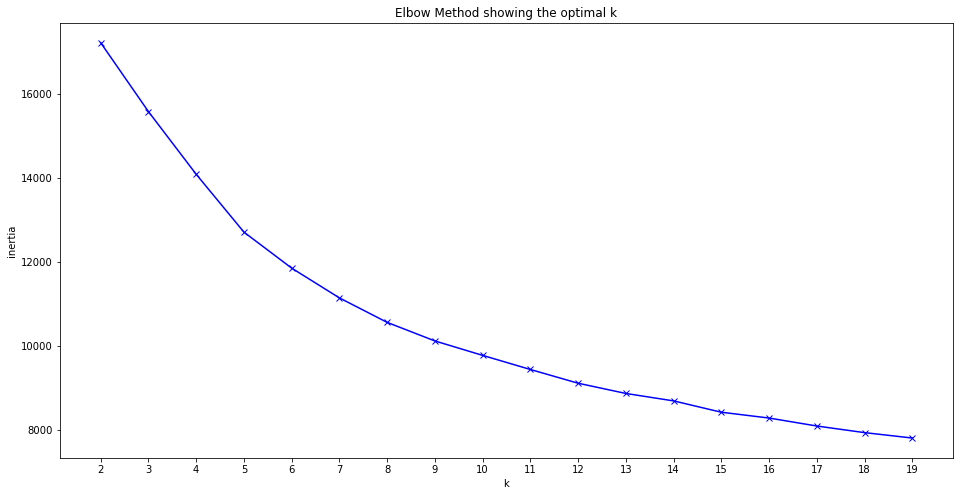

In [779]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

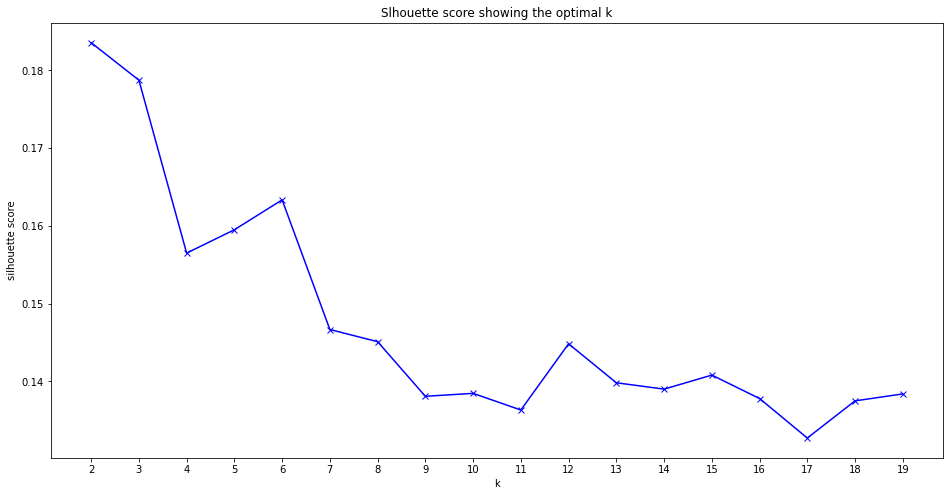

In [780]:
# we want high silhouette score
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_data)
    silhouette.append(silhouette_score(scaled_data, kmeans.predict(scaled_data)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [ ]:
#we want high silhouette value but low inertia

#silhouete 6 is good since it doesnt have a too high inertia
#silhouete 2 is good but has a high interia

In [865]:
#based on later PCA plotting I choose 3 clusters instead of 6
kmeans = KMeans(n_clusters=5,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(scaled_data)
print(kmeans.inertia_)

clusters = kmeans.predict(scaled_data)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

12707.759532909937


0    179
1    595
2    512
3    169
4    816
dtype: int64

In [879]:
# calculate silhouette, davies-bouldin and calinski-harabasz

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

#The minimum score is zero, with lower values indicating better clustering.
davies_bouldin_score(scaled_data, clusters)

1.71615043225131

In [765]:
kmeans

KMeans(init='random', max_iter=10, n_clusters=3, random_state=1234, tol=0)

In [782]:
#save model for further use, we spüeicifed also random state

dump(kmeans, open('kmeans_model.pkl', 'wb'))

In [783]:
clusters

array([1, 1, 2, ..., 1, 1, 1], dtype=int32)

In [866]:
song_df_uri['Kmeans_6:cluster']=clusters
song_df_uri

,title,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Kmeans_6:cluster
0,Family Affair,Mary J. Blige,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu,0.911,0.551,8,-3.750,0,0.0449,0.13200,0.000041,0.0863,0.9690,92.887,265867,4,4
1,Lose Yourself,Eminem,spotify:track:5Z01UMMf7V1o0MzF86s6WJ,0.692,0.744,2,-4.565,1,0.2570,0.00868,0.000423,0.3590,0.0612,171.374,326467,4,3
2,The Joker And The Queen (feat. Taylor Swift),Ed Sheeran,spotify:track:6N1K5OVVCopBjGViHs2IvP,0.528,0.309,0,-7.398,1,0.0329,0.92400,0.000002,0.2820,0.3070,133.830,185422,4,2
3,On My Way (Marry Me),Jennifer Lopez,spotify:track:0PjqDT5SzI91kgzGnylyOd,0.591,0.334,2,-9.199,1,0.0295,0.11900,0.000000,0.1230,0.3880,127.068,192572,4,2
4,Showdown,Electric Light Orchestra,spotify:track:5xAZDlzqvI1wflhB4mzYoz,0.721,0.456,0,-12.524,0,0.0325,0.46800,0.003080,0.1740,0.9640,113.229,249227,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2266,Dirtee Disco,Dizzee Rascal,spotify:track:0APe3BOy7eHbhbsivMqY9Z,0.654,0.958,11,-1.792,0,0.0555,0.03750,0.000003,0.4830,0.9360,128.317,238667,4,1
2267,What's Not To Love,Dwele,spotify:track:3z7RoqiRrSAkFDVp6EFFeK,0.692,0.473,8,-7.554,0,0.0373,0.02540,0.000003,0.1040,0.5900,98.006,205733,4,4
2268,Giddy On Up,Laura Bell Bundy,spotify:track:1OQ0dRegnZE0TVA4mwxhsO,0.756,0.822,2,-2.786,1,0.0305,0.27200,0.000034,0.0970,0.5500,108.007,208067,4,4
2269,Teach Me How To Dougie,Cali Swag District,spotify:track:61LtVmmkGr8P9I2tSPvdpf,0.846,0.438,11,-4.981,1,0.1410,0.20000,0.000094,0.0939,0.5120,85.013,237480,4,4


In [867]:
#save cluster dataframe for future use
song_df_cluster=song_df_uri[['title','artist','Kmeans_6:cluster','uri']]
song_df_cluster.to_pickle("song_clusters.pkl")

### look for colinearity in the audio features we used, maybe something can be improved

<AxesSubplot:>

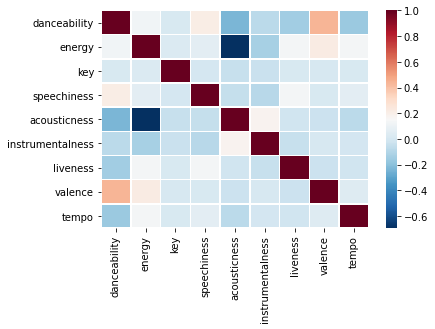

In [824]:
import seaborn as sb

corr = pd.DataFrame(scaled_data).corr()
sb.heatmap(corr, 
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)

In [771]:
# seems like ludness and energy are pretty much correlated, so we could reduce fetaures to taking only one of this values

In [868]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

X_pca = pca.transform(scaled_data)

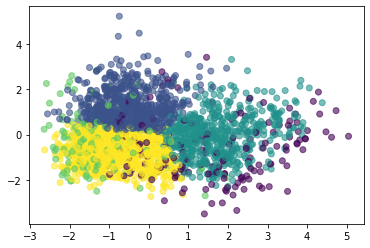

In [869]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=song_df_uri["Kmeans_6:cluster"], alpha=0.6)

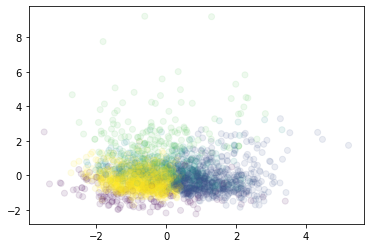

In [870]:
plt.scatter(X_pca[:,1],X_pca[:,2], c=song_df_uri["Kmeans_6:cluster"], alpha=0.1)

In [871]:
#visualize using t-SNE
from sklearn.manifold import TSNE


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/test/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2271 samples in 0.001s...
[t-SNE] Computed neighbors for 2271 samples in 0.191s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2271
[t-SNE] Computed conditional probabilities for sample 2000 / 2271
[t-SNE] Computed conditional probabilities for sample 2271 / 2271
[t-SNE] Mean sigma: 0.809041
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.046906
[t-SNE] KL divergence after 300 iterations: 1.886325
t-SNE done! Time elapsed: 5.8768579959869385 seconds


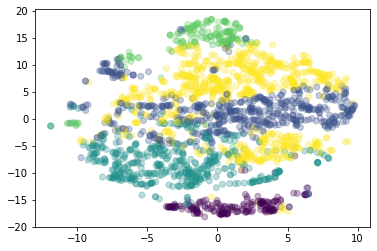

In [873]:
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=song_df_uri["Kmeans_6:cluster"], alpha=0.3)

<ipython-input-843-4a5ea834256f>:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


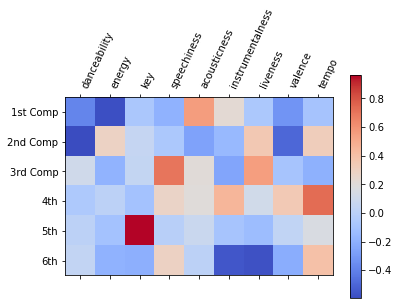

In [843]:
# plot of PCR contribrutions

plt.matshow(pca.components_[0:6], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5],['1st Comp','2nd Comp','3rd Comp','4th','5th','6th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(scaled_data.columns)),scaled_data.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [ ]:
#the first PCA here in this dataset doesnt explain to well most of the variance
#thats why PCR view might be not the best

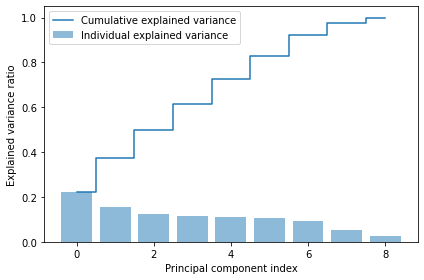

In [874]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()